<a href="https://colab.research.google.com/github/bonthalaakshith/stock-price-prediction-lstm/blob/main/stock_price_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf


In [ ]:
# Define the ticker symbol
ticker_symbol = 'GOOGL'

# Get the stock data
stock_data = yf.Ticker(ticker_symbol)

# Define the time period for the data
start_date = '2022-04-01'
end_date = '2023-04-27'

# Get the historical stock data
historical_data = stock_data.history(start=start_date, end=end_date)

# Choose the feature column for prediction
data = historical_data.filter(['Close'])

# Convert the data to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
# Set the length of the training data
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Create the training data
train_data = scaled_data[0:training_data_len, :]

# Split the training data into x_train and y_train sets
x_train = []
y_train = []
lookback_period = 60
for i in range(lookback_period, len(train_data)):
    x_train.append(train_data[i-lookback_period:i, 0])
    y_train.append(train_data[i, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the training data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
5/5 [==============================] - 5s 57ms/step - loss: 0.0808
Epoch 2/10
5/5 [==============================] - 0s 59ms/step - loss: 0.0180
Epoch 3/10
5/5 [==============================] - 0s 55ms/step - loss: 0.0140
Epoch 4/10
5/5 [==============================] - 0s 57ms/step - loss: 0.0122
Epoch 5/10
5/5 [==============================] - 0s 60ms/step - loss: 0.0099
Epoch 6/10
5/5 [==============================] - 0s 56ms/step - loss: 0.0088
Epoch 7/10
5/5 [==============================] - 0s 56ms/step - loss: 0.0086
Epoch 8/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0079
Epoch 9/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0075
Epoch 10/10
5/5 [==============================] - 0s 54ms/step - loss: 0.0070


2/2 [==============================] - 1s 19ms/step


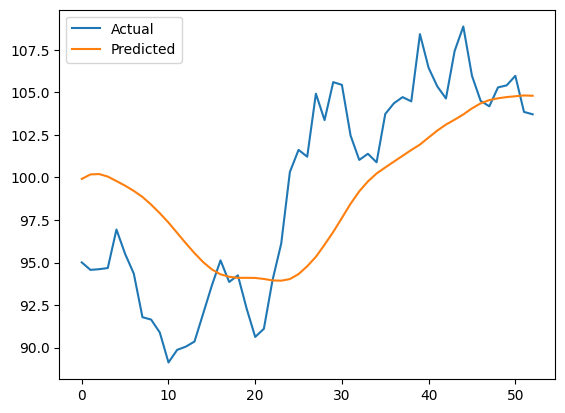

In [ ]:
# Create the test data
test_data = scaled_data[training_data_len - lookback_period:, :]

# Split the test data into x_test and y_test sets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(lookback_period, len(test_data)):
    x_test.append(test_data[i-lookback_period:i, 0])
x_test = np.array(x_test)

# Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predictions and actual values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
